### Import the libraries `numpy`, `sklearn`, `pandans` and `os`

In [79]:
import numpy as np
from sklearn import *
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


### Load the [dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/versions/1)

In [82]:
filepath = "/kaggle/input/pima-indians-diabetes-database/diabetes.csv"
data = pd.read_csv(filepath)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Define the features and labels

In [83]:
features =["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
x = data[features]
y= data.Outcome


### Divide the dataset into train and test

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state = 1)

### Define and train the model

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Evaluation of the model through various metrics

Accuracy: 0.7792207792207793

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



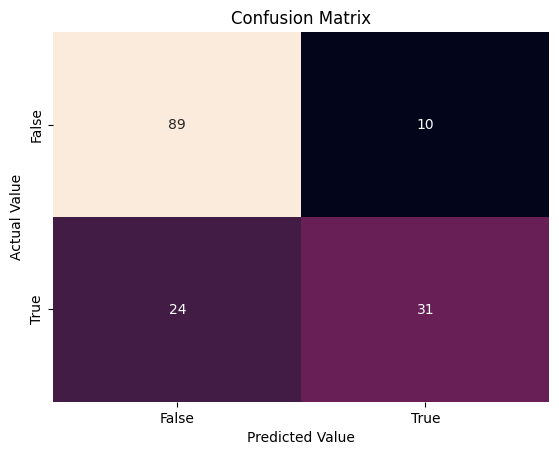

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))


cm= confusion_matrix(y_test,y_pred)
plt.figsize=(8,6)
sns.heatmap(cm, annot = True, cbar = False,linecolor= "black", xticklabels = ["False", "True"] , yticklabels = ["False", "True"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()